In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
train = pd.read_csv('dataAll.csv')
test = pd.read_csv('testAll.csv')

In [4]:
print('一共有 {} 个训练集样本'.format(train.shape[0]))
print('一共有 {} 个测试集样本'.format(test.shape[0]))

一共有 3863 个训练集样本
一共有 497 个测试集样本


In [5]:
train.head()

,21000,21001,21002,21003,21004,21005,21006,21007,21008,21009,...,35007,35008,35009,350010,350011,350012,350013,350014,x,y
0,-126.23,-126.23,-126.23,-96.28,-126.23,-126.23,-126.23,-126.23,-97.92,-124.68,...,-126.23,-126.23,-106.09,-109.26,-94.31,-101.30,-102.86,-126.23,0.0,10.8
1,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-105.06,-95.94,-126.23,...,-126.23,-126.23,-104.70,-126.23,-92.16,-100.80,-101.01,-126.23,0.0,11.4
2,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-95.92,-116.21,...,-126.23,-126.23,-104.64,-126.23,-91.62,-100.41,-100.74,-126.23,0.0,12.0
3,-126.23,-126.23,-126.23,-111.22,-126.23,-126.23,-126.23,-126.23,-96.70,-108.96,...,-126.23,-126.23,-104.57,-126.23,-91.27,-99.74,-100.50,-126.23,0.0,12.6
4,-126.23,-126.23,-126.23,-104.29,-126.23,-126.23,-126.23,-126.23,-96.70,-107.75,...,-126.23,-123.01,-104.55,-126.23,-91.09,-99.12,-100.30,-119.82,0.0,13.2


In [6]:
train['21000'].describe()

count    3863.000000
mean     -120.590513
std        15.179591
min      -126.230000
25%      -126.230000
50%      -126.230000
75%      -126.230000
max       -54.300000
Name: 21000, dtype: float64

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


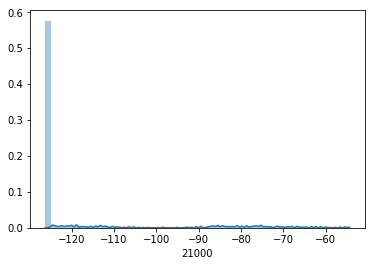

In [7]:
sns.distplot(train['21000']);

In [8]:
print("Skewness: %f" % train['21000'].skew())
print("Kurtosis: %f" % train['21000'].kurt())

Skewness: 2.707398
Kurtosis: 5.989075


In [9]:
a=train.columns.values.tolist()
m=[0,15,1,16,2,17,3,18,4,19,5,20,6,21,7,22,8,23,9,24,10,25,11,26,12,27,13,28,14,29,30,31]
order=[]
for i in m:
    order.extend([a[i]])
reoder_data = train[order]

In [10]:
train_corr = reoder_data.corr()

In [11]:
train_corr.to_csv('cor.csv')

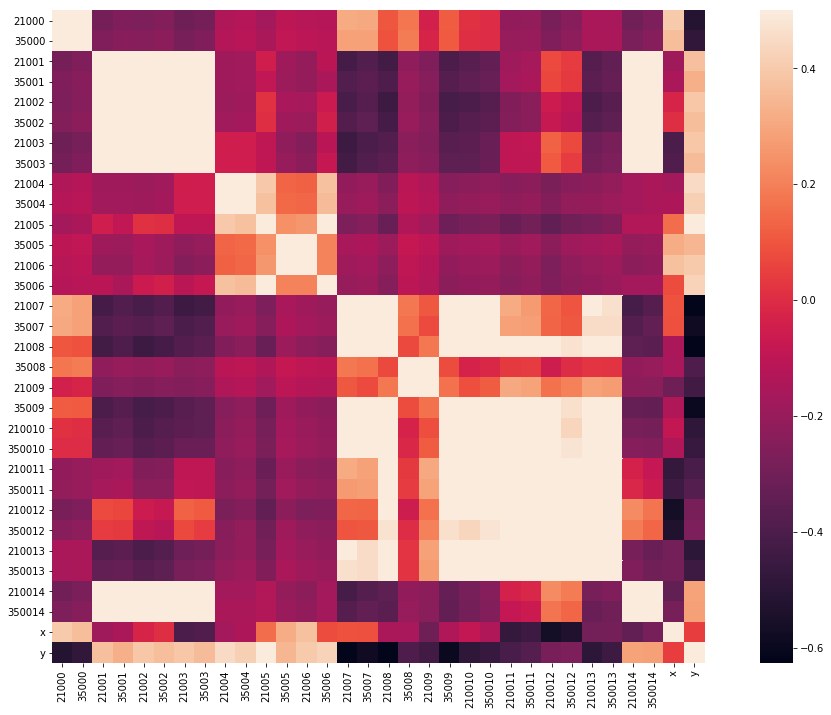

In [31]:
a = plt.subplots(figsize=(20, 12))#调整画布大小
a = sns.heatmap(train_corr, vmax=.5, square=True)#画热力图   annot=True 显示系数

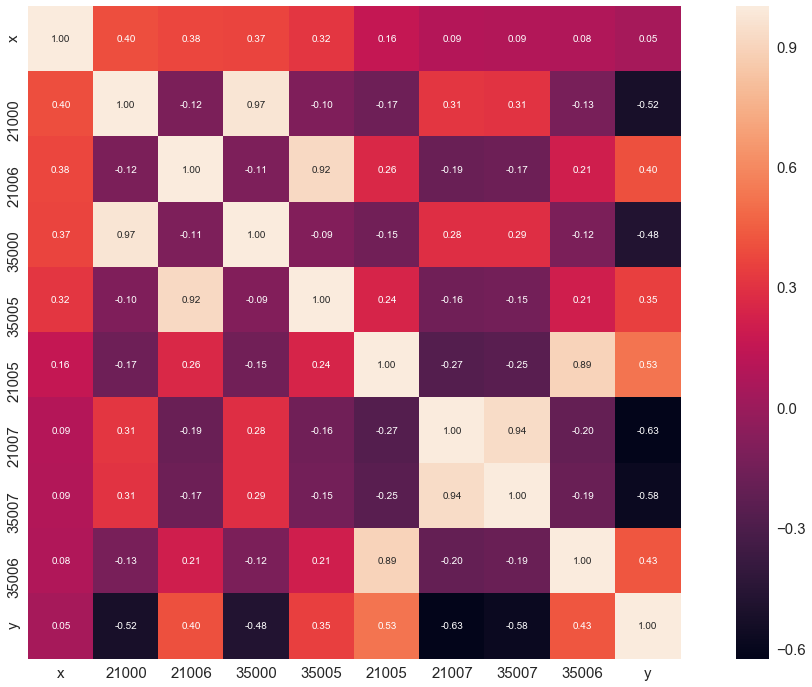

In [34]:
#  X相关性
# 寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'x')['x'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#1,6,7,8

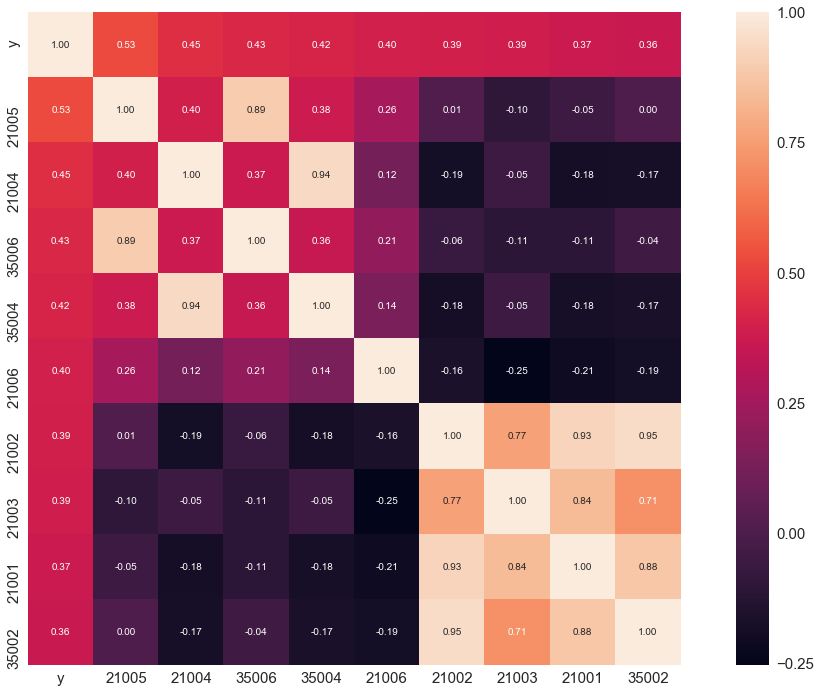

In [35]:
#  y相关性
# 寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'y')['y'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# 2,3,4,5,6,7